# Deep Neural Network from scratch on Image Classification - Dogs or Cats?

## **Phuong T.M. Chu and Hai Nguyen**

**Deep Neural Network from scratch on Image Classification - Dogs or Cats?** is the project that we finished after the 5th week of studying **Machine Learning**.

<p align="center">
  <img width="460" height="300" src="https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg">
</p>

## INTRODUCTION
**Dogs vs. Cats** [dataset](https://www.kaggle.com/c/dogs-vs-cats/data) provided by  Microsoft Research contains 25,000 images of dogs and cats with the labels 
* 1 = dog
* 0 = cat 

Because of our limitation in computational resources, we use only **5000 images** for the trainng dataset.

### Project goals:
1. Building a **deep neural network from scratch** to classify dogs and cats images

2. **Tunning the hyperparameters** of the model in order to achieve high accuracy. This project explores the applicability of deep neural network by tunning these hyperparameters:
    * Learning rate
    * Number of hidden layers
    * Number of nodes in each hiden layers
    * Number of iterations

## BUILDING DEEP NEURAL NETWORK FROM SCRATCH

### Load the dataset

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

np.random.seed(1) # set a seed so that the results are consistent

In [2]:
# Load the data from h5 file
def load_dataset():
    train_dataset = h5py.File('./catdog/catsvsdogs-train.h5', "r")
    train_set_x_orig = np.array(train_dataset["images"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["labels"][:]) # your train set labels
    
    test_dataset = h5py.File('./catdog/catsvsdogs-test.h5', "r")
    test_set_x_orig = np.array(test_dataset["images"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["labels"][:]) # your test set labels
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [3]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig = load_dataset()

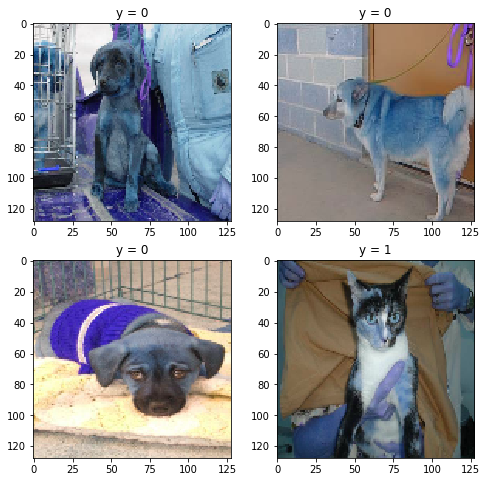

In [4]:
# Some some random images and their labels
plt.subplots(figsize = (8,8))
plt.subplot(221)
index_1 = np.random.randint(0,len(train_set_x_orig)) 
plt.imshow(train_set_x_orig[index_1])
plt.title("y = " + str(train_set_y_orig[index_1]))

plt.subplot(222)
index_2 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_2])
plt.title("y = " + str(train_set_y_orig[index_2]))

plt.subplot(223)
index_3 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_3])
plt.title("y = " + str(train_set_y_orig[index_3]))

plt.subplot(224)
index_4 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_4])
plt.title("y = " + str(train_set_y_orig[index_4]))

plt.show()

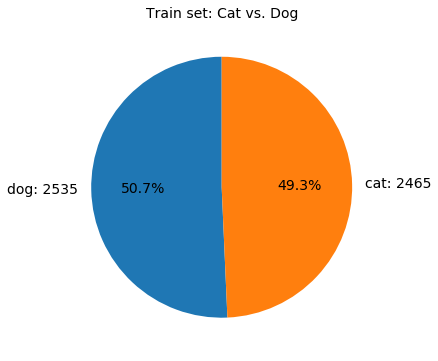

In [5]:
# Visualization the train set labels
unique, counts = np.unique(train_set_y_orig, return_counts = True)
dict1 = dict(zip(unique, counts))
plt.figure(figsize=(6,6))
plt.pie(x = counts, labels = ['dog: %s' % counts[0],'cat: %s' % counts[1]], autopct = '%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Train set: Cat vs. Dog', fontdict={'fontsize': 14})
plt.show()

We have a balanced dataset with **2535 labeled dog images** and **2465 labeled cat images**.

In [6]:
# Convert X to 2D array
X_train = train_set_x_orig.flatten().reshape((len(train_set_x_orig),-1)) / 255
X_test = test_set_x_orig.flatten().reshape((len(test_set_x_orig),-1)) / 255

# Convert y to 1D array
y_train = train_set_y_orig.reshape(1, -1)
y_test = test_set_y_orig.reshape(1, -1)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5000, 49152), (1, 5000), (500, 49152), (1, 500))

### Building deep learning neural network from scratch

In this notebook, we implemented all the functions required to build a deep neural network.

![](https://i.imgur.com/ivhZhmx.png)

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).
    
The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_params`, you should make sure that your dimensions match between each layer. Given $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

|**Layer** |**Shape of W**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |**Shape of b**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|**Activation**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|**Shape of Activation**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|:-|:-|:-|:-|:-|
|**Layer 1**|$(n^{[1]},12288)$|$(n^{[1]},1)$|$Z^{[1]} = W^{[1]}  X + b^{[1]} $|$(n^{[1]},209)$|
| **Layer 2**|$(n^{[2]}, n^{[1]})$|$(n^{[2]},1)$|$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$|$(n^{[2]}, 209)$|
|$\vdots$| $\vdots$ | $\vdots$|$\vdots$|$\vdots$|
|**Layer L-1** | $(n^{[L-1]}, n^{[L-2]})$ | $(n^{[L-1]}, 1)$ | $Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ | $(n^{[L-1]}, 209)$|
|**Layer L** | $(n^{[L]}, n^{[L-1]})$ | $(n^{[L]}, 1)$|  $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$|$(n^{[L]}, 209)$ |


Remember that when we compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}$$

**Mathematical expression of the algorithm**:

![](https://i.imgur.com/FPjpVDX.png)

**Foward propagation:**

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

where $A^{[0]} = X^T$. And the activation functions:

$$A = RELU(Z) = max(0, Z)$$
$$A^{[L]} = sigmoid(Z^{[L]})$$

**Cost function**

$$J = -\frac1m\sum \bigg( Y \odot log(A^{[L]}) + (1-Y) \odot log(1-A^{[L]}) \bigg)$$

> Note that $\odot$ denotes elementwise multiplication.

**Backward propagation**

The three outputs $(dZ^{[l]}, dW^{[l]}, db^{[l]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:

$$dZ^{[l]} =   W^{[l+1]^T}dZ^{[l+1]} \odot g^{[l]'}(Z^{[l]})$$
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$




In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [9]:
def relu(Z):
    return np.maximum(0, Z)

In [10]:
def relu_backward(Z):
    temp = np.ones(Z.shape)
    temp[Z<0] = 0
    return temp

In [11]:
def layer_sizes(X, Y, hidden_layers):
    layer_dims = hidden_layers.copy()
    n_x = X.shape[1]
    n_y = Y.shape[0]
    layer_dims.insert(0,n_x)
    layer_dims.append(n_y)
    
    return layer_dims

In [12]:
def initialize_params(layer_dims):
    np.random.seed(1)
    parameters = {}
    L= len(layer_dims)

    for i in range(1,L):
        parameters['W'+str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1]) / np.sqrt(layer_dims[i-1])
        parameters['b'+str(i)] = np.zeros((layer_dims[i], 1))

        assert (parameters['W'+str(i)].shape == (layer_dims[i], layer_dims[i-1]))
        assert (parameters['b'+str(i)].shape == (layer_dims[i], 1))

    return parameters

In [13]:
def forward_propagation(X, parameters):
    caches = {}
    A_prev = X.T
    L = len(parameters)//2
    
    for i in range(1,L):
        Wi = parameters['W'+str(i)]
#       print('W'+str(i),Wi.shape)
        bi = parameters['b'+str(i)]
#       print('b'+str(i),bi.shape)
        Zi = np.dot(Wi,A_prev)+bi
#       print('Z'+str(i),Zi.shape)
        Ai = relu(Zi)
#       print('A'+str(i),Ai.shape)
      
        caches['A'+str(i)] = Ai
        caches['Z'+str(i)] = Zi
      
        A_prev = Ai
    
    # For last layer
    W_last = parameters['W'+str(L)]
#     print('W'+str(L),W_last.shape)
    b_last = parameters['b'+str(L)]
#     print('b'+str(L),b_last.shape)

    Z_last = np.dot(W_last,A_prev)+b_last
#     print('Z_last',Z_last.shape)
    A_last = sigmoid(Z_last)
#     print('A_last',A_last.shape)

    caches['A'+str(L)] = A_last
    caches['Z'+str(L)] = Z_last
    
    return A_last, caches


In [14]:
def compute_cross_entropy_cost(A_last, Y):
    J = 0
    m = Y.shape[1]
    
    loss = np.multiply(Y, np.log(A_last)) + np.multiply(1-Y, np.log(1-A_last))
    J = (-1/m) * np.sum(loss)
    J = np.squeeze(J) # np.squeeze([24]) => 24
    
    return J

In [15]:
def backward_propagation(X, Y, parameters, caches):
    
    m = X.shape[0]
    L = len(parameters)//2
    grads = {}
    
    A_last_prev = caches['A'+str(L-1)]
    A_last = caches['A'+str(L)]
    
    dZ_last = A_last - Y
    dW_last = (1/m)*np.dot(dZ_last,A_last_prev.T)
    db_last = (1/m)*np.sum(dZ_last, axis = 1, keepdims = True)
    
    grads['dZ'+str(L)] = dZ_last
    grads['dW'+str(L)] = dW_last
    grads['db'+str(L)] = db_last
    
    for i in range(L-1,0,-1):
        W_next = parameters['W'+str(i+1)]
        dZ_next = grads['dZ'+str(i+1)]
        Zi = caches['Z'+str(i)]
        if i > 1:
            Ai_prev = caches['A'+str(i-1)]
        else:
            Ai_prev = X.T
        
#       Ai_prev = caches['A'+str(i-1)]
        dZi = np.multiply(np.dot(W_next.T,dZ_next),relu_backward(Zi))
        dWi = (1/m)*np.dot(dZi,Ai_prev.T)
        dbi = (1/m)*np.sum(dZi,axis = 1, keepdims = True)

        grads['dZ'+str(i)] = dZi
        grads['dW'+str(i)] = dWi
        grads['db'+str(i)] = dbi
    
    return grads

In [16]:
def update_parameters(parameters, grads, learning_rate):
        
    L = len(parameters)//2
    
    for i in range(1,L):
        parameters['W'+str(i)] = parameters['W'+str(i)] - learning_rate*grads['dW'+str(i)] 
        parameters['b'+str(i)] = parameters['b'+str(i)] - learning_rate*grads['db'+str(i)]
    
    return parameters

### Build our neural network in `dnn_model()`

In [17]:
def dnn_model(X, Y, hidden_layers, iterations, learning_rate):
    
    layer_dims = layer_sizes(X, Y, hidden_layers)
    
    parameters = initialize_params(layer_dims)
    
    costs = []
    test_errors = []
    
    for i in range(iterations):
        # Forward propagation
        A_last, caches = forward_propagation(X, parameters)
        # Calculate cost
        J = compute_cross_entropy_cost(A_last, Y)
        # Backward propagation
        grads = backward_propagation(X, Y, parameters, caches)
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print('Iteration %i, Cost: %f' % (i, J))
            costs.append(J)
            
            A_last_test, _ = forward_propagation(X_test, parameters)
            predictions = A_last_test > 0.5
            test_errors.append(1 - accuracy_score(y_test[0], predictions[0]))
            
            
    # plot the cost
    fig, ax = plt.subplots(figsize=(6,8))
    plt.plot(costs)
    plt.plot(test_errors, c='r')
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
            

In [18]:
def predict(X, parameters):
    A_last, caches = forward_propagation(X, parameters)
    predictions = A_last > 0.5
    
    return predictions

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

Iteration 0, Cost: 0.695117
Iteration 100, Cost: 0.670442
Iteration 200, Cost: 0.650986
Iteration 300, Cost: 0.639216
Iteration 400, Cost: 0.629362
Iteration 500, Cost: 0.618675
Iteration 600, Cost: 0.610787
Iteration 700, Cost: 0.599535
Iteration 800, Cost: 0.616132
Iteration 900, Cost: 0.585443
Iteration 1000, Cost: 0.564477
Iteration 1100, Cost: 0.623195
Iteration 1200, Cost: 0.544047
Iteration 1300, Cost: 0.545934
Iteration 1400, Cost: 0.513632
Iteration 1500, Cost: 0.635330
Iteration 1600, Cost: 0.504357
Iteration 1700, Cost: 0.489197
Iteration 1800, Cost: 0.460131


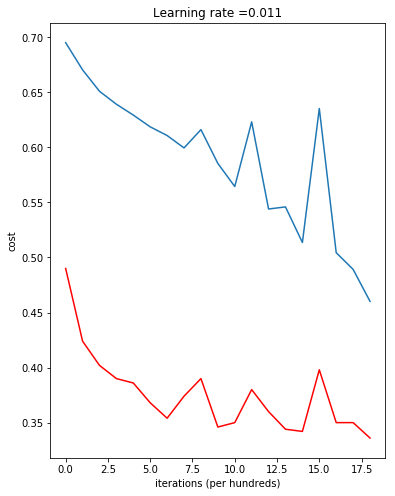

In [26]:
# Train the model
parameters = dnn_model(X_train, y_train, hidden_layers=[32,64,128,256,512], 
                       iterations=1900, learning_rate=0.011)

### Compare training error with test error

In [27]:
predictions_train = predict(X_train, parameters)
print("Accuracy Score - Training set: %f" % accuracy_score(y_train[0], predictions_train[0]))
print("Confusion Matrix:")
print(confusion_matrix(y_train[0], predictions_train[0]))

Accuracy Score - Training set: 0.791400
Confusion Matrix:
[[2118  417]
 [ 626 1839]]


In [33]:
predictions_test = predict(X_test, parameters)

print("Accuracy Score - Test set: %f" % accuracy_score(y_test[0], predictions_test[0]))
print("Confusion Matrix:")
print(confusion_matrix(y_test[0], predictions_test[0]))

Accuracy Score - Test set: 0.668000
Confusion Matrix:
[[185  70]
 [ 96 149]]


### Save the model

In [29]:
import pickle
import os

pickle.dump(dnn_model, open(os.path.join('.', 'dnn.pkl'), 'wb'), protocol=4)

### Print mislabeled images

In [38]:
def print_mislabeled_images(X, y, p):
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (400, 400) # set default size of plots
    num_images = len(mislabeled_indices[0])
#    for i in range(num_images):
    for i in range(10):
        index = mislabeled_indices[1][i]

        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[index, :].reshape(128, 128, 3), interpolation='nearest')
        plt.axis('off')
        #plt.title("Prediction: " + str(int(p[0,index])) + " \n Class: " + str(y[0,index]))
        plt.title("Prediction: " + ("Cat" if int(p[0,index]) == 1 else "Dog") + 
                  (" \n Label: " + ("Cat" if y[0,index] == 1 else "Dog")))

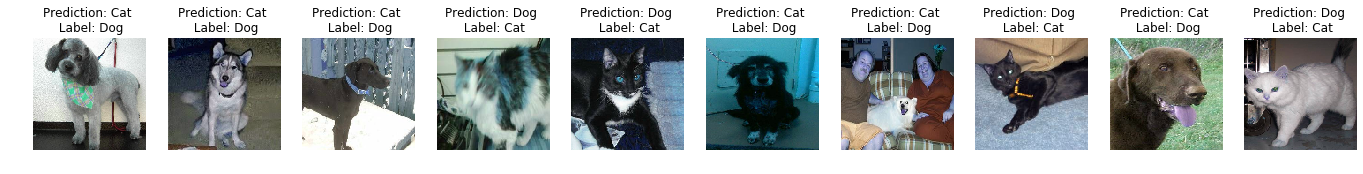

In [39]:
print_mislabeled_images(X_test, y_test, predictions_test)

### Model from sklearn

Try a sklearn model to solve the problem.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X_train, y_train[0])

# Show metrics
print("Accuracy Score: %f" % accuracy_score(y_test[0], lg.predict(X_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test[0], lg.predict(X_test)))

Accuracy Score: 0.576000
Confusion Matrix:
[[130 125]
 [ 87 158]]


## CONCLUSION

We achieved the **Accuracy score of 66.8%** which is **better than** the Accuracy score of Logistic Regression Model in **sklearn (57.6%)**. Our hyperparameters are:
* Learning rate = `0.011`
* Number of hidden layers = `5`
* Number of nodes in each hidden layers = `[32,64,128,256,512]`
* Number of iterations = `1900`